In [1]:
import os,glob,sys
import pandas as pd
import numpy as np
import pickle

%load_ext autoreload
%autoreload 2


In [2]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/'

osp = MAC

In [9]:
sys.path.append('..')
import alignment

## Load the necessary files

In [3]:
samples_values = pd.read_csv(osp+'pymz/mzmine/221119/modifiedRTfiltereddata.txt', sep='\t', index_col = 0)
samples_values_filled = pd.read_csv(osp+'pymz/mzmine/221119/modifiedRTfiltereddatafilled.txt', sep = '\t', index_col = 0)

annotated_data = pd.read_csv(osp+'pymz/mzmine/221119/annotated_data.csv', sep = ',', index_col = 0)

Next, I will match the filtered peaks with the ToxID standards information and add any relevant annotation.


## Defining the Kynurenine pathway


In [47]:
for i in range(18):
    print(i+1,pathway['pathway'][i])
    print_boxplots_for_pathway(pathway['pathway'][i], samples_values_filled)
    print('---------------------------------')
   

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-2485da34bf76>", line 2, in <module>
    print(i+1,pathway['pathway'][i])
NameError: name 'pathway' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_ge

NameError: name 'pathway' is not defined

In [49]:
id_list_kyn_paths = [1463, 1439, 1448, 1221, 712, 5128, 2042, 2038, 4109, 1229, 1190, 1189]

In [10]:
with open(os.path.join(osp,'pymz/mzmine/aligner_gp.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

In [51]:
from metab_utils import extract_peaksets_with_spectra_from_filt_dataset
peaksets_kyn = extract_peaksets_with_spectra_from_filt_dataset(aligner_gp, id_list_kyn_paths)

1463 L-Kynurenine; 3-Anthraniloyl-L-alanine$Formyl-5-hydroxykynurenamine
0.000377445036711281


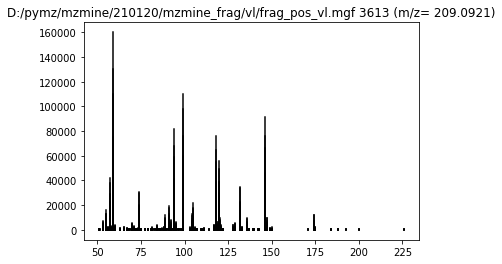

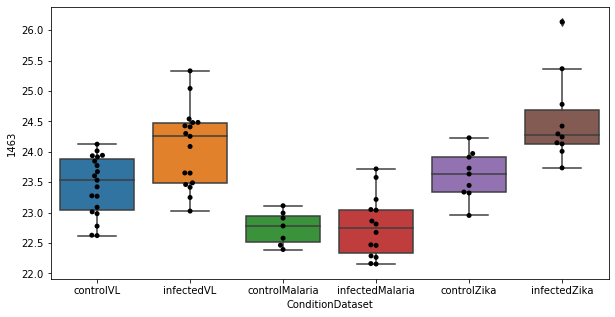

1439 L-Tryptophan; Tryptophan; (S)-alpha-Amino-beta-(3-indolyl)-propionic acid$D-Tryptophan
0.0274255843824485


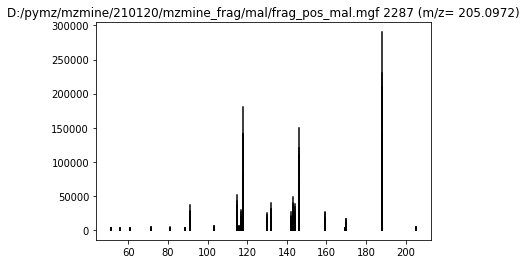

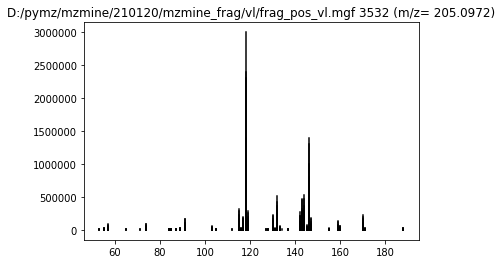

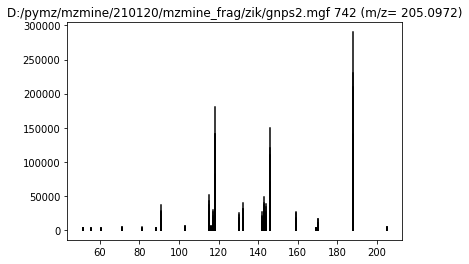

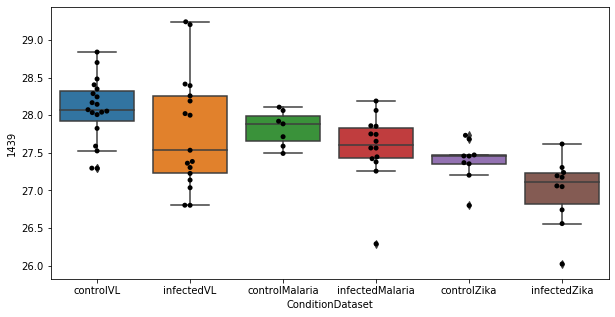

1448 L-Tryptophan; Tryptophan; (S)-alpha-Amino-beta-(3-indolyl)-propionic acid$D-Tryptophan
0.0308338339097839


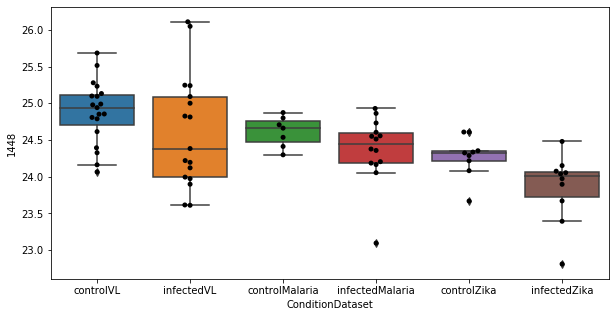

1221 1-Nitronaphthalene-7,8-oxide$1-Nitronaphthalene-5,6-oxide$4-Hydroxy-2-quinolinecarboxylic acid; Kynurenic acid; Kynurenate
0.00593808350194387


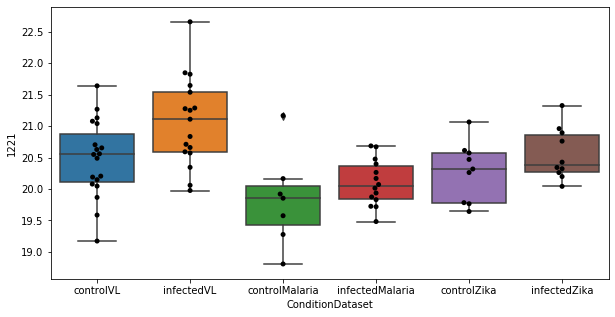

712 3-Hydroxyanthranilate; 3-Hydroxyanthranilic acid
0.39484855991907297


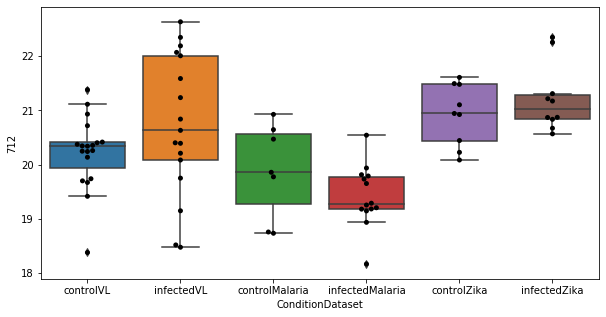

5128 Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
0.08198822670996601


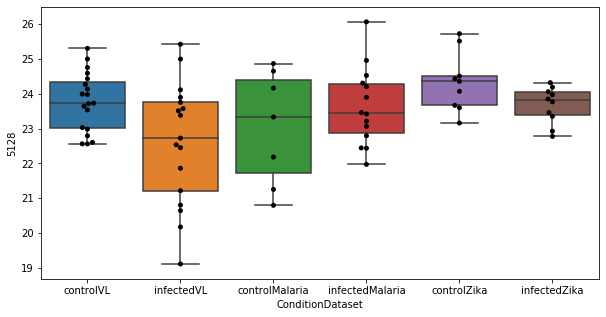

2042 Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
0.147666002009876


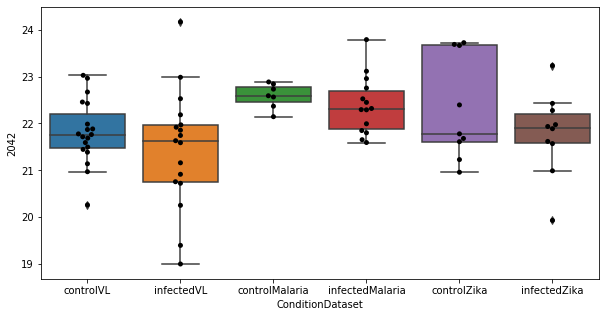

2038 Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
0.17740184635112502


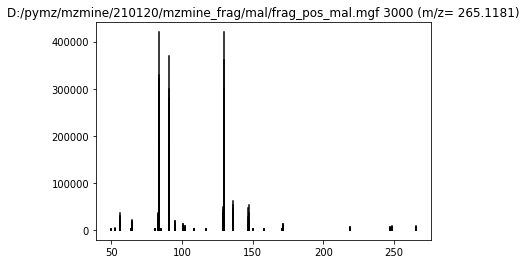

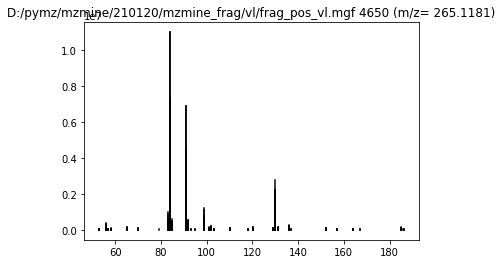

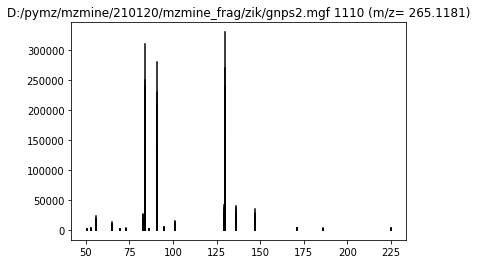

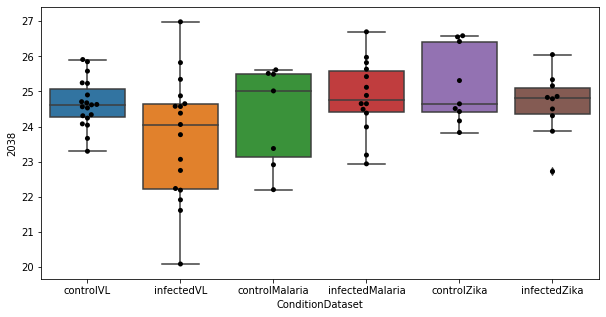

4109 Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
0.4335923618048621


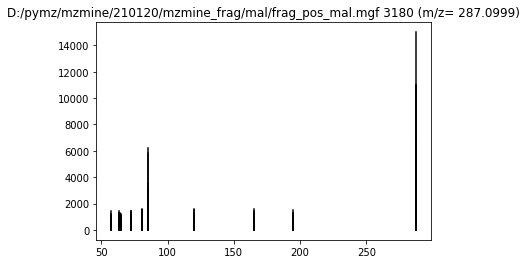

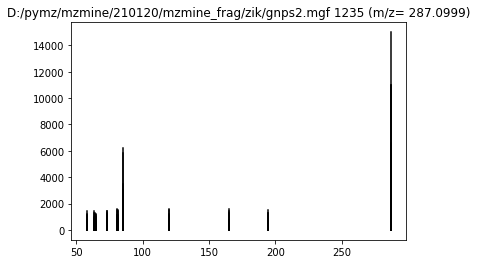

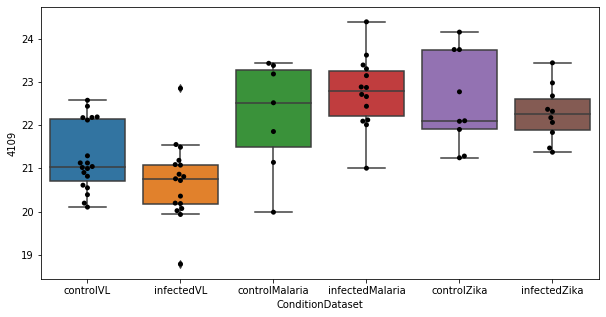

1229 methyl indole-3-acetate
0.00038242926529061


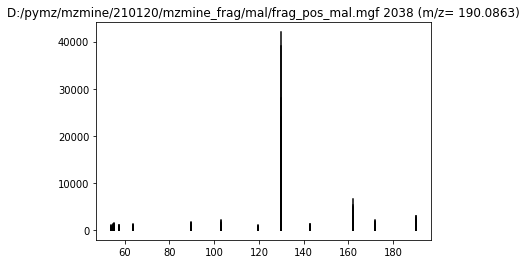

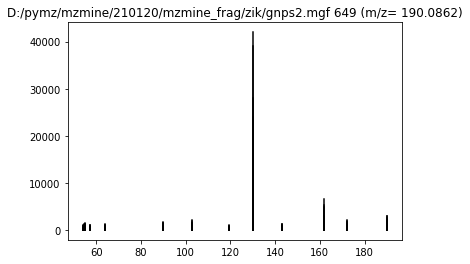

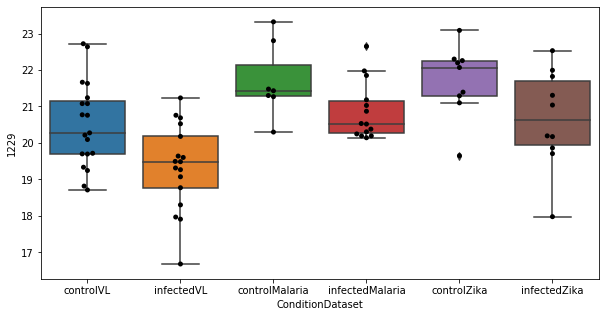

1190 5-Methoxyindoleacetate
0.00120218554256834


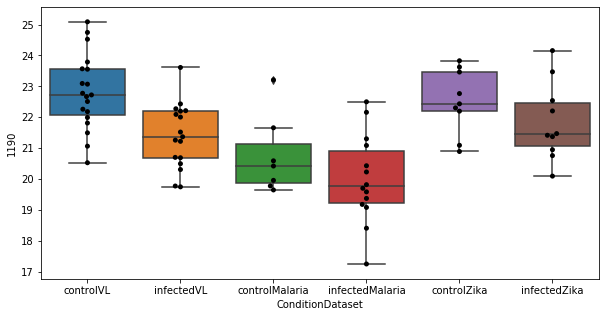

1189 5-Methoxyindoleacetate
0.0209499245448804


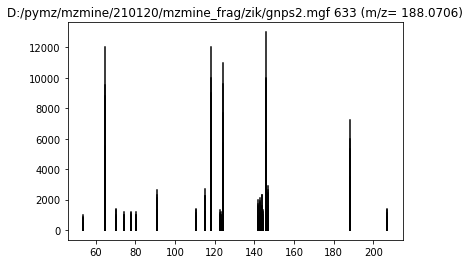

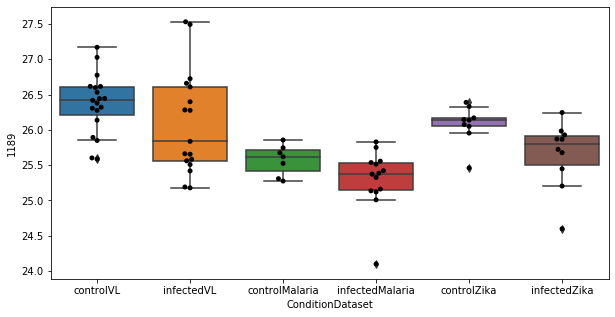

{(205.09722965642027, 10.04137518800422): [0.774384329168728], (265.11812079580204, 6.808058892163617): [0.8487324622460065]}


In [52]:
for idk, peakset in zip(id_list_kyn_paths,peaksets_kyn):
    print(filtered_peaks.loc[idk][4], filtered_peaks.loc[idk][5] )
    print(filtered_peaks.loc[idk][2])
    np = peakset.n_peaks
    if np > 1:
        for i in range(np-1):
            peakset.peaks[i+1].ms2_spectrum.plot()
            plt.show()
    metab_utils.plot_boxplots(samples_values_filled, str(filtered_peaks.loc[idk][4]), 'ConditionDataset', (15,30), y = False )
    print('=============')
print(metab_utils.extract_scores_pairs_for_dataset(peaksets_kyn, 'vl', 'zik'))

Based on ms2 spectra, 2038 is more likely to be: alpha-N-Phenylacetyl-L-glutamine, rather than Formyl-N-acetyl-5-methoxykynurenamine.
But 4109, possibly Formyl-N-acetyl-5-methoxykynurenamine. 

ID: 1463 Mummichog names: L-Kynurenine; 3-Anthraniloyl-L-alanine$Formyl-5-hydroxykynurenamine
Standards names: L-Kynurenine


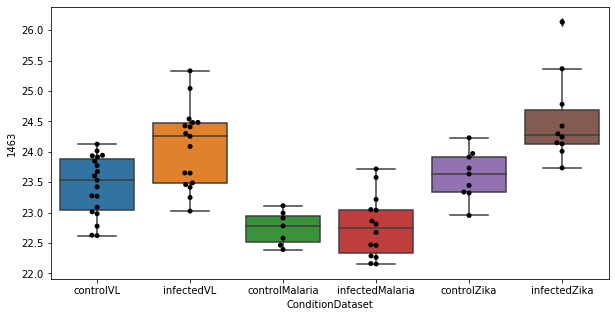

ID: 1229 Mummichog names: methyl indole-3-acetate
Standards names: nan


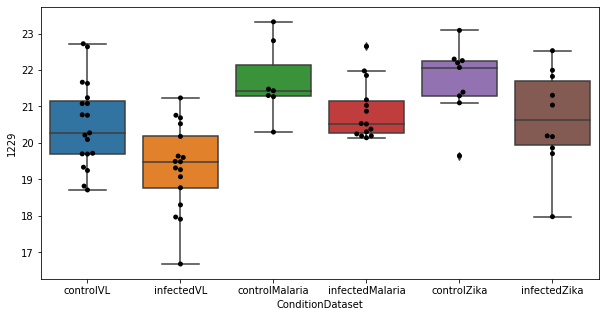

ID: 1190 Mummichog names: 5-Methoxyindoleacetate
Standards names: nan


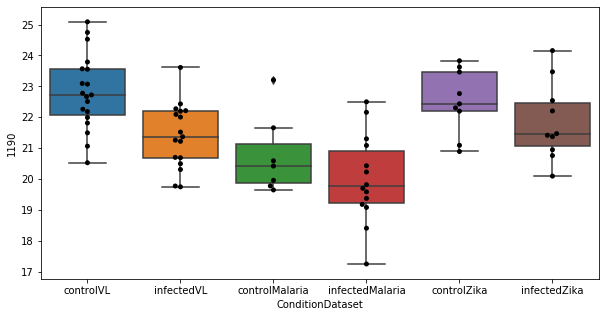

ID: 1221 Mummichog names: 1-Nitronaphthalene-7,8-oxide$1-Nitronaphthalene-5,6-oxide$4-Hydroxy-2-quinolinecarboxylic acid; Kynurenic acid; Kynurenate
Standards names: nan


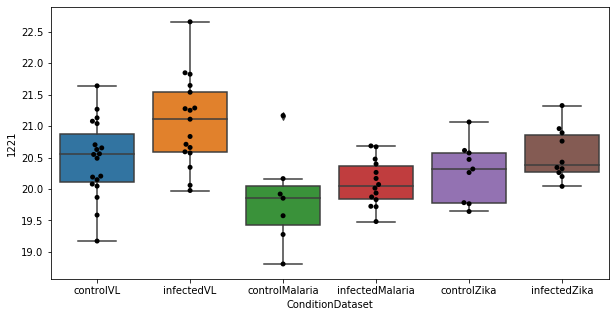

ID: 1189 Mummichog names: 5-Methoxyindoleacetate
Standards names: nan


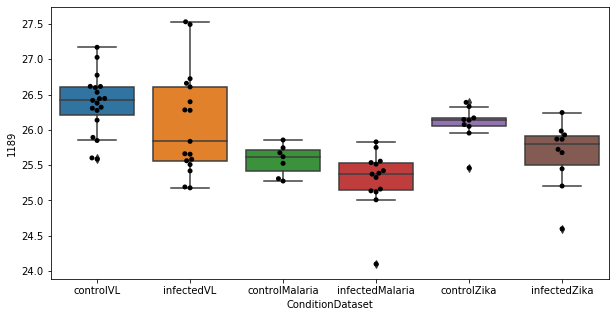

ID: 1439 Mummichog names: L-Tryptophan; Tryptophan; (S)-alpha-Amino-beta-(3-indolyl)-propionic acid$D-Tryptophan
Standards names: L-Tryptophan


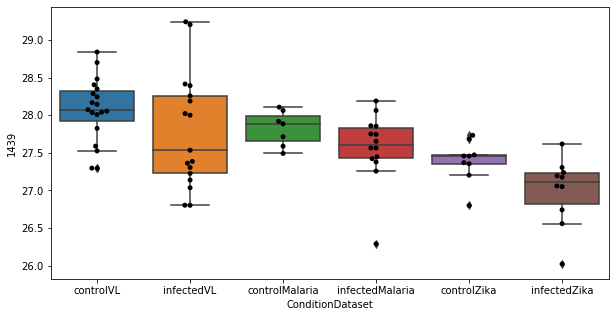

ID: 1448 Mummichog names: L-Tryptophan; Tryptophan; (S)-alpha-Amino-beta-(3-indolyl)-propionic acid$D-Tryptophan
Standards names: nan


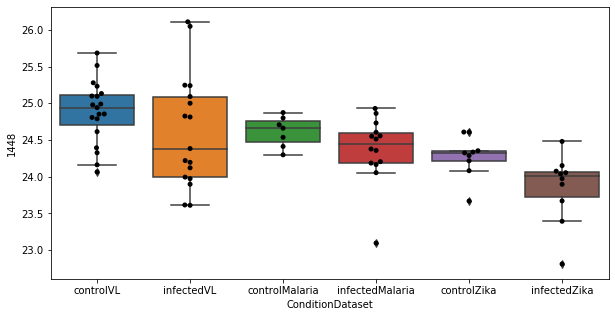

ID: 5128 Mummichog names: Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
Standards names: nan


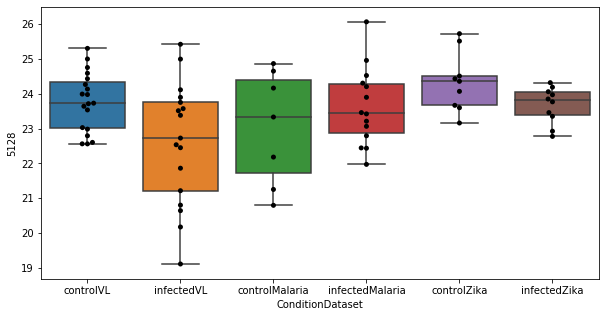

ID: 2042 Mummichog names: Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
Standards names: nan


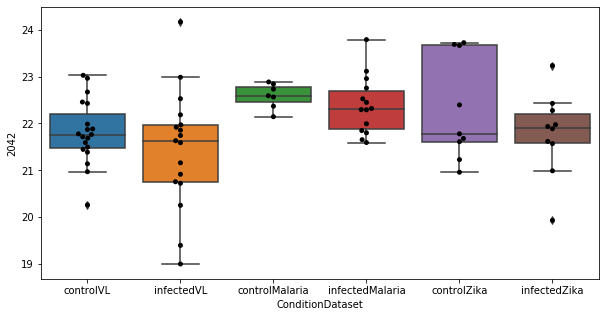

ID: 2038 Mummichog names: Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
Standards names: nan


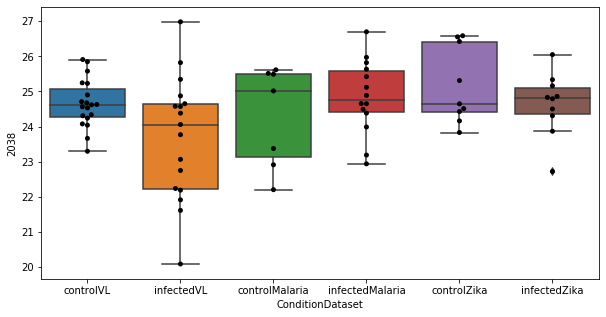

ID: 712 Mummichog names: 3-Hydroxyanthranilate; 3-Hydroxyanthranilic acid
Standards names: nan


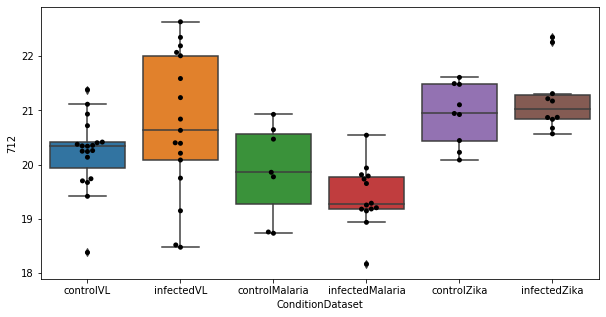

ID: 4109 Mummichog names: Formyl-N-acetyl-5-methoxykynurenamine$alpha-N-Phenylacetyl-L-glutamine
Standards names: nan


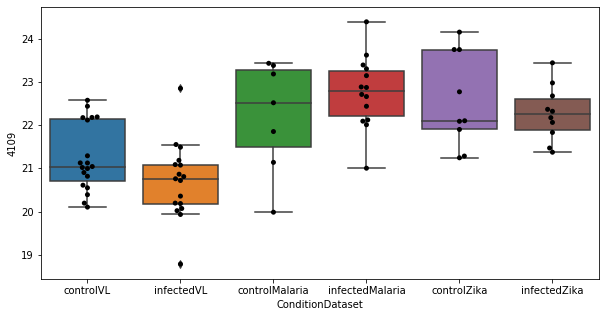

In [17]:
for i,row in filtered_peaks.iterrows():
    cmp = str(row['compound_names'])
    std = str(row['standards_match'])
    cid = int(row['custom_id'])
   
    if cid in id_list_kyn_paths:
        print('ID:',i,'Mummichog names:',cmp)
        print('Standards names:',std)
        metab_utils.plot_boxplots(samples_values_filled, str(cid), 'ConditionDataset', (15,30), y = False )

ID: 755 Mummichog names: 3-methylcrotonoylglycine
Standards names: nan


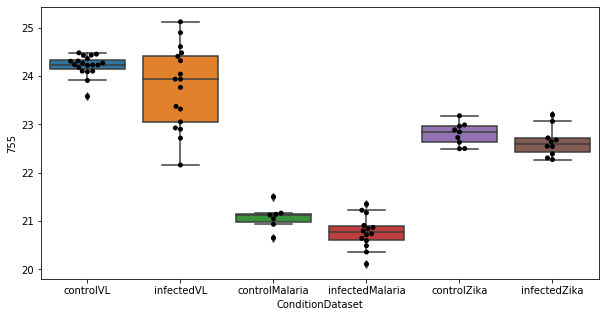

In [38]:
for i,row in filtered_peaks.iterrows():
    cmp = str(row['compound_names'])
    std = str(row['standards_match'])
    cid = int(row['custom_id'])
   
    if 'cr' in cmp:
        print('ID:',i,'Mummichog names:',cmp)
        print('Standards names:',std)
        metab_utils.plot_boxplots(samples_values_filled, str(cid), 'ConditionDataset', (15,30), y = False )